<a href="https://colab.research.google.com/github/saransh2396/kaggle/blob/main/Happiness_score_prediction_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Loading the datasets
df_2015 = pd.read_csv('/content/drive/MyDrive/Kaggle/World Happiness Score/2015.csv')
df_2016 = pd.read_csv('/content/drive/MyDrive/Kaggle/World Happiness Score/2016.csv')
df_2017 = pd.read_csv('/content/drive/MyDrive/Kaggle/World Happiness Score/2017.csv')
df_2018 = pd.read_csv('/content/drive/MyDrive/Kaggle/World Happiness Score/2018.csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/Kaggle/World Happiness Score/2019.csv')

In [3]:
#Adding a year column in each dataset so that when we will merge it we will be able to identify what year is the data of
df_2015['year']=2015
df_2016['year']=2016
df_2017['year']=2017
df_2018['year']=2018
df_2019['year']=2019


In [4]:
df_2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019


In [5]:
df_2018.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018


In [6]:
df_2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [7]:
df_2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [8]:
df_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


# Data Preparation

In [9]:
columns_to_drop2015 = [
    'Region', 'Standard Error', 'Dystopia Residual'
]

columns_to_drop2016 = [
    'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual']

columns_to_drop2017 = [
    'Whisker.high', 'Whisker.low', 'Dystopia.Residual'
]

#no cols to drop for 2018 and 2019

df_2015.drop(columns_to_drop2015, axis='columns', inplace=True)
df_2016.drop(columns_to_drop2016, axis='columns', inplace=True)
df_2017.drop(columns_to_drop2017, axis='columns', inplace=True)


In [10]:
df_2015.head(1)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015


In [11]:
df_2016.head(1)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016


In [12]:
df_2017.head(1)

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017


In [13]:
df_2018.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018


In [14]:
# Reorded the columns in all five data sets to ensure all columns were in the same order
df_2017 = df_2017.iloc[:, [0,1,2,3,4,5,6,8,7,9]]
df_2018 = df_2018.iloc[:, [1,0,2,3,4,5,6,8,7,9]]
df_2019 = df_2019.iloc[:, [1,0,2,3,4,5,6,8,7,9]]

In [15]:
#Standardized the naming conventions of the coumns across all five data sets 
df_2015 = df_2015.rename(columns={'Country': 'country', 'Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'GDP_per_capita', \
                                    'Family': 'social_support', 'Health (Life Expectancy)' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust (Government Corruption)': 'absence_of_corruption', 'Generosity': 'generosity'})

df_2016 = df_2016.rename(columns={'Country': 'country', 'Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'GDP_per_capita', \
                                    'Family': 'social_support', 'Health (Life Expectancy)' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust (Government Corruption)': 'absence_of_corruption', 'Generosity': 'generosity'})

df_2017 = df_2017.rename(columns={'Country': 'country', 'Happiness.Rank': 'happiness_rank', 'Happiness.Score': 'happiness_score', 'Economy..GDP.per.Capita.': 'GDP_per_capita', \
                                    'Family': 'social_support', 'Health..Life.Expectancy.' : 'healthy_life_expectancy', 'Freedom': 'freedom', \
                                    'Trust..Government.Corruption.': 'absence_of_corruption', 'Generosity': 'generosity'})

df_2018 = df_2018.rename(columns={'Country or region': 'country', 'Overall rank': 'happiness_rank', 'Score': 'happiness_score', 'GDP per capita': 'GDP_per_capita', \
                                    'Social support': 'social_support', 'Healthy life expectancy' : 'healthy_life_expectancy', 'Freedom to make life choices': 'freedom', \
                                    'Perceptions of corruption': 'absence_of_corruption', 'Generosity': 'generosity'})

df_2019 = df_2019.rename(columns={'Country or region': 'country', 'Overall rank': 'happiness_rank', 'Score': 'happiness_score', 'GDP per capita': 'GDP_per_capita', \
                                    'Social support': 'social_support', 'Healthy life expectancy' : 'healthy_life_expectancy', 'Freedom to make life choices': 'freedom', \
                                    'Perceptions of corruption': 'absence_of_corruption', 'Generosity': 'generosity'})

In [16]:
#Concatenating all datasets
df = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019])
df.head()

,country,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [17]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019])

# Data Info

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  782 non-null    object 
 1   happiness_rank           782 non-null    int64  
 2   happiness_score          782 non-null    float64
 3   GDP_per_capita           782 non-null    float64
 4   social_support           782 non-null    float64
 5   healthy_life_expectancy  782 non-null    float64
 6   freedom                  782 non-null    float64
 7   absence_of_corruption    781 non-null    float64
 8   generosity               782 non-null    float64
 9   year                     782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


In [19]:
df.isnull().sum()

country                    0
happiness_rank             0
happiness_score            0
GDP_per_capita             0
social_support             0
healthy_life_expectancy    0
freedom                    0
absence_of_corruption      1
generosity                 0
year                       0
dtype: int64

In [20]:
df.dropna(axis=0,inplace=True)

In [21]:
df.isnull().sum()

country                    0
happiness_rank             0
happiness_score            0
GDP_per_capita             0
social_support             0
healthy_life_expectancy    0
freedom                    0
absence_of_corruption      0
generosity                 0
year                       0
dtype: int64

In [22]:
df.describe()

,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,78.773367,5.377232,0.914537,1.078780,0.612342,0.411254,0.125436,0.218618,2016.992318
std,45.162398,1.127071,0.405403,0.329581,0.248459,0.152911,0.105816,0.122394,1.417814
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509000,0.605000,0.870210,0.440060,0.310480,0.054000,0.130000,2016.000000
50%,79.000000,5.321000,0.982000,1.125000,0.647239,0.431000,0.091000,0.202000,2017.000000
75%,118.000000,6.182000,1.233748,1.328000,0.808000,0.531000,0.156030,0.279060,2018.000000
max,158.000000,7.769000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


# EDA

In [23]:
df.head(2)

,country,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015


In [24]:
df['country'].nunique()

170

Data is of 170 Countries

In [25]:
data = df.copy()

In [26]:
top5=data[data['happiness_rank']<6]

In [27]:
bottom5 =data[data['happiness_rank']>153]

In [28]:
top5.head(2)

,country,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015


In [29]:
bottom5.head(2)

,country,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015


## Happiest Country of each year

In [30]:
Happiest = top5[top5['happiness_rank']<2]

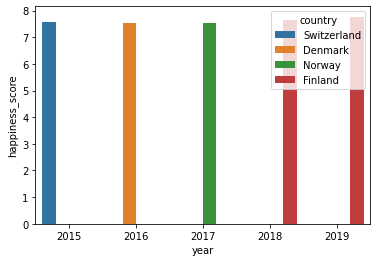

In [31]:
sns.barplot(x='year',y='happiness_score',hue='country',data=Happiest)

## Least Happy country of each year

In [32]:
#Least happy country of each year
Least_Happy = bottom5[bottom5['happiness_rank']>=156]

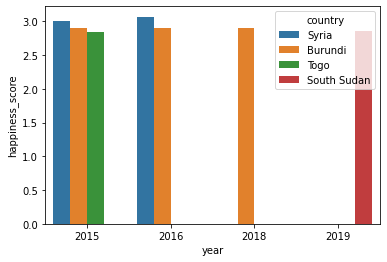

In [33]:
sns.barplot(x='year',y='happiness_score',hue='country',data=Least_Happy)

In [34]:
df15 = df_2015['happiness_score'].mean()
df16 = df_2016['happiness_score'].mean()
df17 = df_2017['happiness_score'].mean()
df18 = df_2018['happiness_score'].mean()
df19 = df_2019['happiness_score'].mean()
data = np.array([df15,df16,df17,df18,df19])

In [35]:
dict1 = {2015:df15,2016:df16,2017:df17,2018:df18,2019:df19}
line = pd.DataFrame(dict1.items(),columns=['year','Average Happiness Score'])
line

,year,Average Happiness Score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096


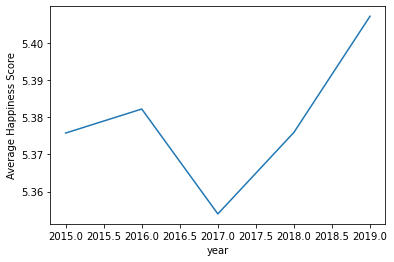

In [36]:
sns.lineplot(x=line['year'],y='Average Happiness Score',data=line)
plt.show()

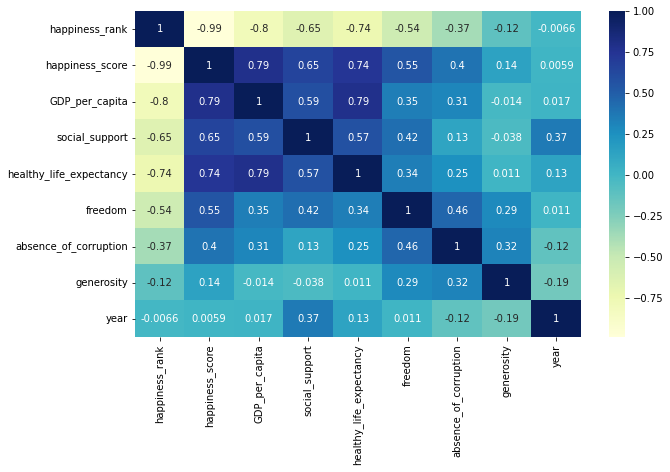

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

##Happiness Score is dependent on :-
######GDP per Capita
######Social Support
######Health Life Expectancy
######Freedom

# Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


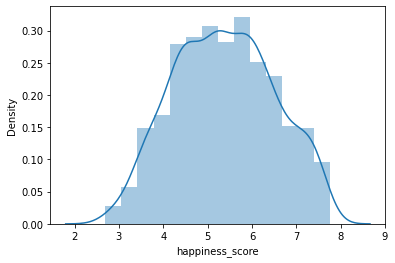

In [38]:
sns.distplot(df['happiness_score'])

In [39]:
numerical_values = df.describe().columns

In [40]:
numerical_values

Index(['happiness_rank', 'happiness_score', 'GDP_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom', 'absence_of_corruption',
       'generosity', 'year'],
      dtype='object')

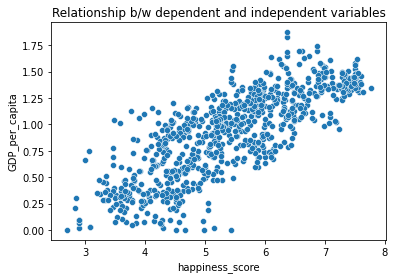

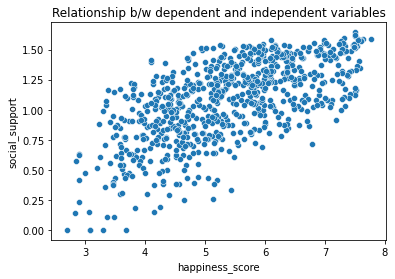

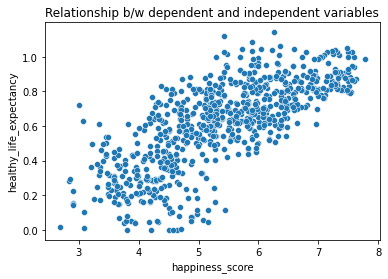

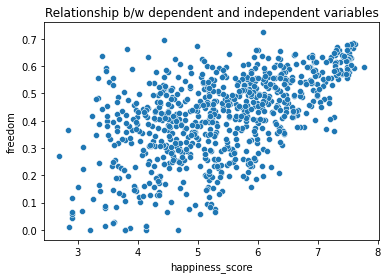

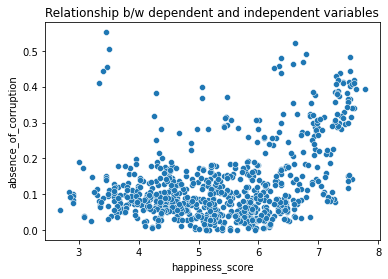

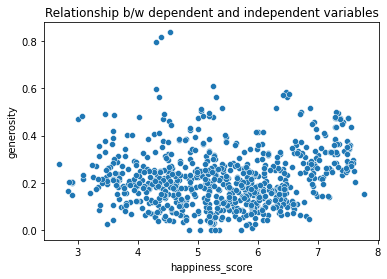

In [41]:
for col in numerical_values[2:-1]:
  sns.scatterplot(y=df[col],x=df['happiness_score'],data=df)
  plt.title('Relationship b/w dependent and independent variables')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


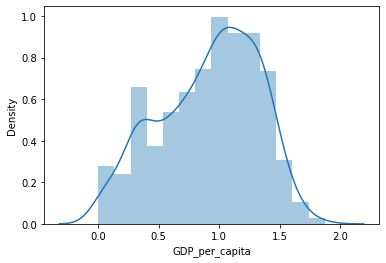

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


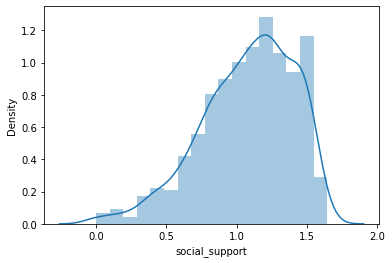

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


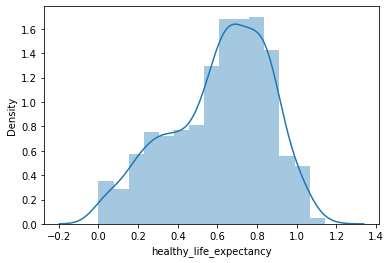

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


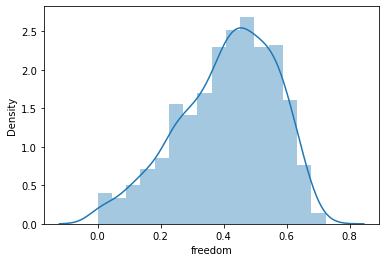

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


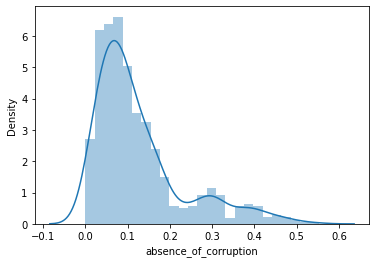

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


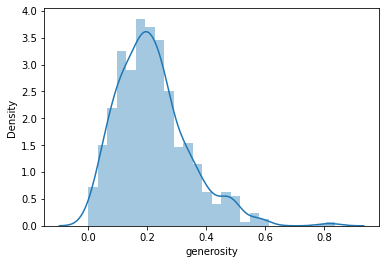

In [42]:
for col in numerical_values[2:-1]:
  sns.distplot(df[col])
  plt.show()

In [43]:
df.skew().sort_values(ascending=True)

social_support            -0.687846
freedom                   -0.524083
healthy_life_expectancy   -0.500058
GDP_per_capita            -0.344068
happiness_rank            -0.001685
year                       0.008180
happiness_score            0.038272
generosity                 1.042836
absence_of_corruption      1.520888
dtype: float64

##Skewed data

###Right Skewed data


*   generosity
*   absence_of_corruption



In [44]:
right_ske_numeric = ['generosity','absence_of_corruption']

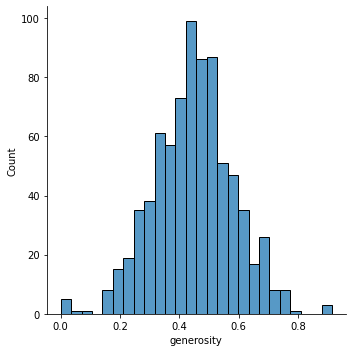

<Figure size 504x504 with 0 Axes>

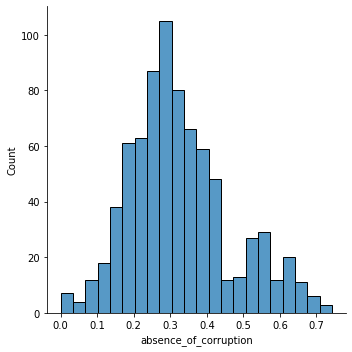

<Figure size 504x504 with 0 Axes>

In [45]:
#For right skewed data
for col in right_ske_numeric:
  sns.displot(np.sqrt(df[col]))
  plt.figure(figsize=(7,7))

# Removing Outliers

We cannot remove any outlied data because if we remove it will remove the whole row and in each row countries are ranked on the basis of their happiness 

# Removing Multicollinearity

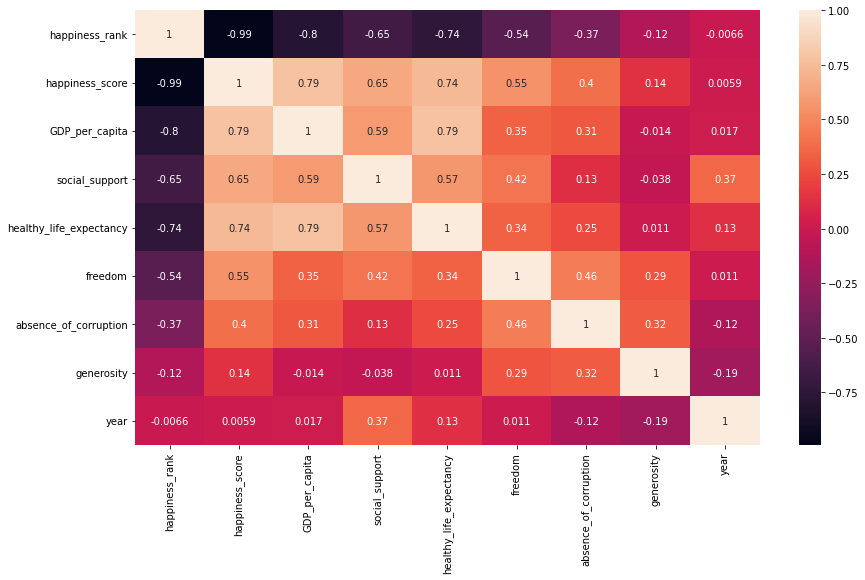

In [46]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [47]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [48]:
calc_vif(df[[i for i in df.describe().columns if i not in ['happiness_score','happiness_rank','year']]])

,variables,VIF
0,GDP_per_capita,18.284337
1,social_support,16.871811
2,healthy_life_expectancy,19.358253
3,freedom,12.730241
4,absence_of_corruption,3.455971
5,generosity,4.295658


We can not remove any feature as all feature means different things.

In [49]:
df.head()

,country,happiness_rank,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


# Feature Engineering

Now, we will select the features in order to predict the happiness score. We will drop country, happiness_rank and year columns as they will not help in predicting the happiness score clearly.

In [50]:
data = df.copy()

In [51]:
data.drop(['country','happiness_rank','year'],axis=1,inplace=True)

In [52]:
data.head()

,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom,absence_of_corruption,generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


#Feature Selection

In [53]:
X = data.iloc[:,1:].values
y = data['happiness_score'].values

In [54]:
X.shape,y.shape

((781, 6), (781,))

# Implementing Linear Regression

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(546, 6)
(235, 6)
(546,)
(235,)


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
linreg = LinearRegression()

In [58]:
linreg.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred_lin_train = linreg.predict(X_train)
y_pred_lin_test = linreg.predict(X_test)

## Regression evaluation metrics on Linear Regression

In [60]:
#Calculating MSE, MAE and RMSE
MSE  = mean_squared_error(y_test,y_pred_lin_test)
print("MSE :" , MSE)

MAE=mean_absolute_error(y_test,y_pred_lin_test)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.2770166568691292
MAE : 0.4296457410780678
RMSE : 0.5263237187027858


In [61]:
#R square
r2_lin_train = r2_score(y_train,y_pred_lin_train)*100
r2_lin_train

75.11558267806461

In [62]:
r2_lin_test = r2_score(y_test,y_pred_lin_test)*100
r2_lin_test

78.83721057324668

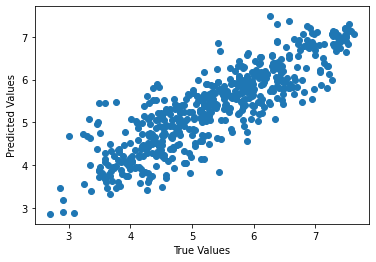

In [63]:
#Analysing True values and Predicted Values
plt.scatter(y_train,y_pred_lin_train)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

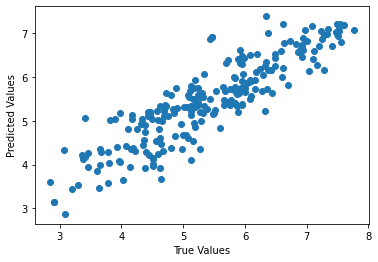

In [64]:
#Analysing True values and Predicted Values
plt.scatter(y_test,y_pred_lin_test)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [65]:
e = y_test - y_pred_lin_test # residual 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


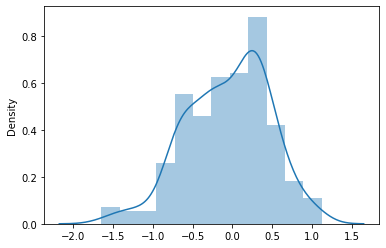

In [66]:
#Residual Analysis
sns.distplot(e)
plt.show()

# Implementing Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rfc = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [69]:
#Fitting Random Forest Regressor
rfc.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [70]:
#Predicting on training dataset
y_reg_pred = rfc.predict(X_train)

In [71]:
#Predicting on testing dataset
y_reg_pred_test = rfc.predict(X_test)

In [72]:
#Calculating MSE, MAE and RMSE
MSE_rfc  = mean_squared_error(y_test,y_reg_pred_test)
print("MSE :" , MSE_rfc)

MAE_rfc=mean_absolute_error(y_test,y_reg_pred_test)
print("MAE :" ,MAE_rfc)

RMSE_rfc = np.sqrt(MSE_rfc)
print("RMSE :" ,RMSE_rfc)

MSE : 0.20379152506180456
MAE : 0.36125684073779757
RMSE : 0.451432746997606


In [73]:
#r square
r2_rfc_train=r2_score(y_train,y_reg_pred)*100
r2_rfc_train

97.01342489779256

In [74]:
#r square
r2_rfc_test=r2_score(y_test,y_reg_pred_test)*100
r2_rfc_test

84.43127146005021

###Model is overfitted so using Grid Search to optimize it.

# Hyperparameter tuning 

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
#Assigning the parameters
parameters = {'criterion':['squared_error','absolute_error','poisson'],'max_features':['auto', 'sqrt', 'log2']}

In [77]:
#Performing the grid search using the parameters with cv of 5
grid = GridSearchCV(rfc,parameters,cv=5,scoring='neg_mean_squared_error')
#Fitting it on our training dataset
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

In [78]:
grid.best_params_

{'criterion': 'squared_error', 'max_features': 'sqrt'}

In [79]:
rfr_2 = RandomForestRegressor(n_estimators = 100, random_state = 0,criterion= 'squared_error', max_features= 'sqrt',max_depth=8)

In [80]:
#Fitting Random Forest Regressor after getting the best parameters
rfr_2.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', random_state=0)

In [81]:
#Predicting on our training dataset
y_rfr = rfr_2.predict(X_train)

In [82]:
#Predicting on ou testing dataset
y_rfr_test = rfr_2.predict(X_test)

## Regression Evaluation Metrics on Random Forest Regressor after using Grid Search CV.

In [83]:
#Calculating MSE, MAE and RMSE
MSE_rfc_grid  = mean_squared_error(y_test,y_rfr_test)
print("MSE :" , MSE_rfc_grid)

MAE_rfc_grid=mean_absolute_error(y_test,y_rfr_test)
print("MAE :" ,MAE_rfc_grid)

RMSE_rfc_grid = np.sqrt(MSE_rfc_grid)
print("RMSE :" ,RMSE_rfc_grid)

MSE : 0.2224891472523741
MAE : 0.3798180475084316
RMSE : 0.4716875525730715


In [84]:
#r2 score
r2_rfc_grid_train = r2_score(y_train,y_rfr)*100
r2_rfc_grid_train

93.06221564553144

In [85]:
#r2 score
r2_rfc_grid_test = r2_score(y_test,y_rfr_test)*100
r2_rfc_grid_test

83.00285973321692

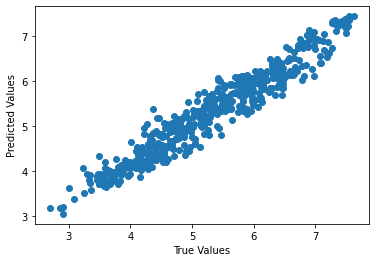

In [86]:
#Analysing True values and Predicted Values
plt.scatter(y_train,y_rfr)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

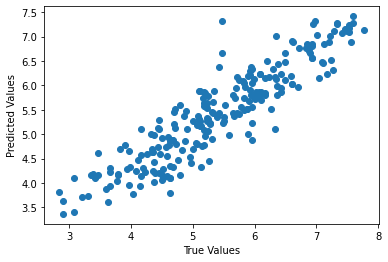

In [87]:
#Analysing True values and Predicted Values
plt.scatter(y_test,y_rfr_test)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [88]:
e = y_test - y_rfr_test # residual 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


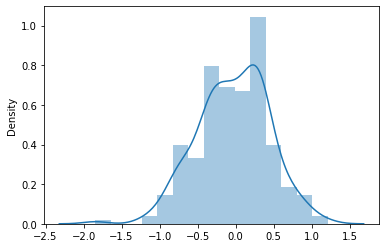

In [89]:
sns.distplot(e)
plt.show()

# The End